In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head(10)

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000
6,413758,Ungifted: My Life and Journey,NaN,NaN,23,598.000000
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,<p><strong>Aluminum Foil Stickers-good kitchen...,6030,984.251967
8,2050239,PUMA Cali Sport Clean Women's Sneakers White L...,[Style Name:-Cali Sport Clean Women's Sneakers...,NaN,3302,393.700000
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,"Transform your home, workplace or hotel room i...",8201,393.700787


In [4]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   PRODUCT_ID       2249698 non-null  int64  
 1   TITLE            2249686 non-null  object 
 2   BULLET_POINTS    1412334 non-null  object 
 3   DESCRIPTION      1092317 non-null  object 
 4   PRODUCT_TYPE_ID  2249698 non-null  int64  
 5   PRODUCT_LENGTH   2249698 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [5]:
data.drop(["DESCRIPTION", "BULLET_POINTS"], axis = 1, inplace = True)

In [6]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   PRODUCT_ID       2249698 non-null  int64  
 1   TITLE            2249686 non-null  object 
 2   PRODUCT_TYPE_ID  2249698 non-null  int64  
 3   PRODUCT_LENGTH   2249698 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 68.7+ MB


In [14]:
X_train = data.drop(['PRODUCT_ID', 'PRODUCT_LENGTH'], axis=1)
y_train = data['PRODUCT_LENGTH']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_title = vectorizer.fit_transform(X_train['TITLE'].fillna(''))

In [16]:
X_train = hstack((X_train_title, X_train_desc, X_train_bullet))

NameError: name 'X_train_desc' is not defined

In [17]:
X_train = hstack((X_train_title))

ValueError: blocks must be 2-D

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'ArtzFolio Tulip Flowers Blackout Curtain for Door, Window & Room | Eyelets & Tie Back | Canvas Fabric | Width 4.5feet (54inch) Height 5 feet (60 inch); Set of 2 PCS'

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_title, y_train)

LinearRegression()

In [20]:
test_data = pd.read_csv('test.csv')

In [21]:
X_test_title = vectorizer.transform(test_data['TITLE'].fillna(''))

In [22]:
y_pred = model.predict(X_test_title)

In [23]:
submission_data = pd.DataFrame({'PRODUCT_ID': test_data['PRODUCT_ID'], 'PRODUCT_LENGTH': y_pred})
submission_data.to_csv('submission.csv', index=False)

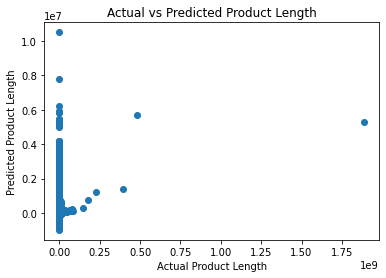

In [24]:
plt.scatter(y_train, model.predict(X_train_title))
plt.xlabel('Actual Product Length')
plt.ylabel('Predicted Product Length')
plt.title('Actual vs Predicted Product Length')
plt.show()


In [25]:
data.head(30)

,PRODUCT_ID,TITLE,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,6112,598.424000
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,5725,950.000000
6,413758,Ungifted: My Life and Journey,23,598.000000
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,6030,984.251967
8,2050239,PUMA Cali Sport Clean Women's Sneakers White L...,3302,393.700000
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,8201,393.700787


In [26]:
group_data = data.groupby(['PRODUCT_TYPE_ID']).count()

In [27]:
group_data

,PRODUCT_ID,TITLE,PRODUCT_LENGTH
PRODUCT_TYPE_ID,,,
0,50505,50505,50505
1,121199,121196,121199
2,664,664,664
3,4265,4265,4265
4,6877,6877,6877
...,...,...,...
13416,101,101,101
13417,2,2,2
13418,3,3,3


In [28]:
print(data.groupby(['PRODUCT_TYPE_ID']).count())

                 PRODUCT_ID   TITLE  PRODUCT_LENGTH
PRODUCT_TYPE_ID                                    
0                     50505   50505           50505
1                    121199  121196          121199
2                       664     664             664
3                      4265    4265            4265
4                      6877    6877            6877
...                     ...     ...             ...
13416                   101     101             101
13417                     2       2               2
13418                     3       3               3
13419                    28      28              28
13420                     8       8               8

[12907 rows x 3 columns]


In [29]:
print(group_data.sort_values(by='PRODUCT_LENGTH', ascending=False))

                 PRODUCT_ID   TITLE  PRODUCT_LENGTH
PRODUCT_TYPE_ID                                    
1                    121199  121196          121199
12064                 57554   57554           57554
0                     50505   50505           50505
123                   31527   31527           31527
6104                  29690   29689           29690
...                     ...     ...             ...
3551                      1       1               1
8854                      1       1               1
3549                      1       1               1
3548                      1       1               1
6641                      1       1               1

[12907 rows x 3 columns]


In [30]:
group_data_sort = group_data.sort_values(by='PRODUCT_LENGTH', ascending=False)

In [31]:
df_new = group_data_sort[group_data_sort['PRODUCT_LENGTH'] != 1]

In [32]:
df_new.head(30)

,PRODUCT_ID,TITLE,PRODUCT_LENGTH
PRODUCT_TYPE_ID,,,
1,121199,121196,121199
12064,57554,57554,57554
0,50505,50505,50505
123,31527,31527,31527
6104,29690,29689,29690
2879,22464,22464,22464
2986,19643,19643,19643
2916,18506,18506,18506
99,17740,17740,17740
